## Sentiment Analysis on ProjectTweets

Version control link: https://github.com/mariadominguez2023/CA2-BDS-ADA.git

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Read data from csv file**

In [2]:
data = pd.read_csv('ProjectTweets.csv')
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
#Shape of the dataframe
data.shape

(1599999, 6)

In [4]:
#Checking the type of data
#data.info()

In [5]:
# Data preparation
# ==============================================================================
data = data.rename(columns={'1467810369': 'Tweet_ID', 'Mon Apr 06 22:19:45 PDT 2009': 'date','_TheSpecialOne_': 'Twitter_User'})
data.head()

,0,Tweet_ID,date,NO_QUERY,Twitter_User,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
data['NO_QUERY'].count()

1599999

In [7]:
def format_data(data):

  last_col = str(data.columns[-1])
  #first_col = str(data.columns[0])

  data.rename(columns = {last_col: 'tweet_text'}, inplace=True) 

  # Change 0, 2, 4 to negative, neutral and positive
 # labels = {0: 'negative', 2: 'neutral', 4: 'positive'}
  #data['polarity'] = data['polarity'].map(labels)

  # Get only the two columns
  return data[['Tweet_ID','date','Twitter_User','tweet_text']]

In [8]:
data = format_data(data)
data.head(10)

,Tweet_ID,date,Twitter_User,tweet_text
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew
5,1467811592,Mon Apr 06 22:20:03 PDT 2009,mybirch,Need a hug
6,1467811594,Mon Apr 06 22:20:03 PDT 2009,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,1467811795,Mon Apr 06 22:20:05 PDT 2009,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,1467812025,Mon Apr 06 22:20:09 PDT 2009,mimismo,@twittera que me muera ?
9,1467812416,Mon Apr 06 22:20:16 PDT 2009,erinx3leannexo,spring break in plain city... it's snowing


In [9]:
#Creating a new column "title_mod" using lambda function
data["tweet_mod"]=data["tweet_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data.head()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew,@kwesidei not the whole crew


In [11]:
#Removing any special character from text
data["tweet_mod"]=data["tweet_mod"].str.replace("[^\w\s]","")

In [12]:
data.head()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew,kwesidei not the whole crew


In [13]:
#pip install textblob

In [14]:
#Importing textblow library
from textblob import TextBlob

In [15]:
# Extract the emotional value, the sentiment from this text
#first number is the sentimient, second is the number times this words is talked about
data["tweet_mod"][:5].apply(lambda x : TextBlob(x).sentiment)

0       (0.0, 0.0)
1       (0.5, 0.5)
2       (0.2, 0.4)
3    (-0.625, 1.0)
4       (0.2, 0.4)
Name: tweet_mod, dtype: object

In [16]:
#creating a new column "sentiment"
#going through each of the comments and exgtracting the sentiment analysis stored into it
data["sentiment"]=data["tweet_mod"].apply(lambda x: TextBlob(x).sentiment[0])

In [17]:
data.head()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod,sentiment
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,0.000
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,0.500
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.200
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...,-0.625
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew,kwesidei not the whole crew,0.200


In [18]:
#import numpy as np
#Applying lambda function to categorise the sentimente of the text either "negative" or positive.
data['sentiment_score'] = data['sentiment'].apply(lambda x: 'Positive' if x > 0.2 else('Neutral' if x == 0.2 else 'Negative'))
#df['Polarity_Rating'] = df['Rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [19]:
data.head()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod,sentiment,sentiment_score
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,0.000,Negative
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,0.500,Positive
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.200,Neutral
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...,-0.625,Negative
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew,kwesidei not the whole crew,0.200,Neutral


In [20]:
data.tail()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod,sentiment,sentiment_score
1599994,2193601966,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,1.0000,Positive
1599995,2193601969,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom very cool to hear old walt intervie...,0.2775,Positive
1599996,2193601991,Tue Jun 16 08:40:49 PDT 2009,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover ask me fo...,0.2000,Neutral
1599997,2193602064,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...,0.8000,Positive
1599998,2193602129,Tue Jun 16 08:40:50 PDT 2009,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...,happy charitytuesday thenspcc sparkscharity sp...,0.8000,Positive


**Plot the Sentiment_score visualization graph**

<Axes: xlabel='sentiment_score', ylabel='count'>

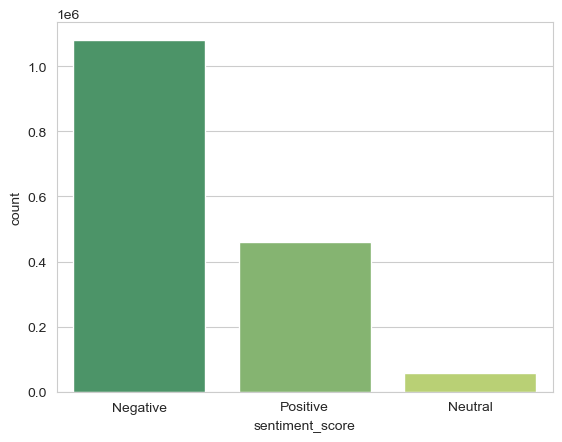

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='sentiment_score',data=data, palette='summer')

**Data Preprocessing**

In [22]:
data_Positive = data[data['sentiment_score'] == 'Positive'][0:8000] 
data_Neutral = data[data['sentiment_score'] == 'Neutral']
data_Negative = data[data['sentiment_score'] == 'Negative']

**Sample negative and neutral polarity dataset and create final dataframe**

In [23]:
data_Neutral_final = data_Neutral.sample(8000, replace=True)
data_Negative_final = data_Negative.sample(8000, replace=True)
data = pd.concat([data_Positive, data_Neutral_final, data_Negative_final], axis=0)

In [30]:
data.head()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod,sentiment,sentiment_score,Project_tweets
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,0.500000,Positive,kenichan dived many times ball managed save 50...
6,1467811594,Mon Apr 06 22:20:03 PDT 2009,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time no see yes rains a bit ...,0.273333,Positive,loltrish hey long time see yes rains bit bit l...
17,1467813579,Mon Apr 06 22:20:31 PDT 2009,starkissed,@LettyA ahh ive always wanted to see rent lov...,lettya ahh ive always wanted to see rent love ...,0.500000,Positive,lettya ahh ive always wanted see rent love sou...
19,1467813985,Mon Apr 06 22:20:37 PDT 2009,quanvu,@alydesigns i was out most of the day so didn'...,alydesigns i was out most of the day so didnt ...,0.350000,Positive,alydesigns day didnt get much done
27,1467815199,Mon Apr 06 22:20:56 PDT 2009,abel209,ooooh.... LOL that leslie.... and ok I won't ...,ooooh lol that leslie and ok i wont do it agai...,0.225000,Positive,ooooh lol leslie ok wont leslie wont get mad


In [31]:
data.shape

(24000, 8)

**Text Preprocessing**

In [32]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

**Apply the method "get_text_processing" into column review text**

In [33]:
data['Project_tweets'] = data['tweet_mod'].apply(get_text_processing)
data.head()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod,sentiment,sentiment_score,Project_tweets
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,0.500000,Positive,kenichan dived many times ball managed save 50...
6,1467811594,Mon Apr 06 22:20:03 PDT 2009,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time no see yes rains a bit ...,0.273333,Positive,loltrish hey long time see yes rains bit bit l...
17,1467813579,Mon Apr 06 22:20:31 PDT 2009,starkissed,@LettyA ahh ive always wanted to see rent lov...,lettya ahh ive always wanted to see rent love ...,0.500000,Positive,lettya ahh ive always wanted see rent love sou...
19,1467813985,Mon Apr 06 22:20:37 PDT 2009,quanvu,@alydesigns i was out most of the day so didn'...,alydesigns i was out most of the day so didnt ...,0.350000,Positive,alydesigns day didnt get much done
27,1467815199,Mon Apr 06 22:20:56 PDT 2009,abel209,ooooh.... LOL that leslie.... and ok I won't ...,ooooh lol that leslie and ok i wont do it agai...,0.225000,Positive,ooooh lol leslie ok wont leslie wont get mad


**Visualize Project tweets with sentiment score**

In [34]:
data_new = data[['Project_tweets', 'sentiment_score']]
data_new.head()

,Project_tweets,sentiment_score
1,kenichan dived many times ball managed save 50...,Positive
6,loltrish hey long time see yes rains bit bit l...,Positive
17,lettya ahh ive always wanted see rent love sou...,Positive
19,alydesigns day didnt get much done,Positive
27,ooooh lol leslie ok wont leslie wont get mad,Positive


**Apply One hot encoding on negative, neutral, and positive**

In [35]:
one_hot = pd.get_dummies(data["sentiment_score"])
data_new.drop(['sentiment_score'],axis=1,inplace=True)
data_score = pd.concat([data_new,one_hot],axis=1)
data_score.head()

,Project_tweets,Negative,Neutral,Positive
1,kenichan dived many times ball managed save 50...,0,0,1
6,loltrish hey long time see yes rains bit bit l...,0,0,1
17,lettya ahh ive always wanted see rent love sou...,0,0,1
19,alydesigns day didnt get much done,0,0,1
27,ooooh lol leslie ok wont leslie wont get mad,0,0,1


**Apply Train Test Split**

In [36]:
X = data_score['Project_tweets'].values
y = data_score.drop('Project_tweets', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [37]:
X

array(['kenichan dived many times ball managed save 50 rest go bounds',
       'loltrish hey long time see yes rains bit bit lol im fine thanks hows',
       'lettya ahh ive always wanted see rent love soundtrack', ...,
       'jon kate make saaadd everyone needs stop tlkn',
       'going try hand chicken korma tonight wish luck',
       'alexstarcher dont come back im going miss'], dtype=object)

In [38]:
#y

**Apply vectorization**

In [39]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

**Apply frequency, inverse document frequency:**

In [40]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

**Build Neural Network model by adding different layers**

In [41]:
model = Sequential()

model.add(Dense(units=1000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

**Fit the Model**

In [42]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=0, callbacks=early_stop)

Epoch 3: early stopping


**Evaluation of Model**

In [43]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=0)
print('Test accuracy:', model_score[1])

Test accuracy: 0.8043055534362793


**Prediction**

In [44]:
preds = model.predict(X_test)
preds

225/225 [==============================] - 5s 22ms/step


array([[6.3289903e-02, 3.0948353e-01, 6.2722653e-01],
       [9.8301297e-01, 5.5560945e-03, 1.1430963e-02],
       [6.6932201e-02, 9.2781776e-01, 5.2500628e-03],
       ...,
       [2.6744625e-03, 1.9539215e-03, 9.9537164e-01],
       [3.6807131e-04, 1.4885864e-03, 9.9814332e-01],
       [2.3333393e-03, 3.0114441e-04, 9.9736553e-01]], dtype=float32)

## **Times Series section**

In [45]:
data.head()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod,sentiment,sentiment_score,Project_tweets
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,0.500000,Positive,kenichan dived many times ball managed save 50...
6,1467811594,Mon Apr 06 22:20:03 PDT 2009,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time no see yes rains a bit ...,0.273333,Positive,loltrish hey long time see yes rains bit bit l...
17,1467813579,Mon Apr 06 22:20:31 PDT 2009,starkissed,@LettyA ahh ive always wanted to see rent lov...,lettya ahh ive always wanted to see rent love ...,0.500000,Positive,lettya ahh ive always wanted see rent love sou...
19,1467813985,Mon Apr 06 22:20:37 PDT 2009,quanvu,@alydesigns i was out most of the day so didn'...,alydesigns i was out most of the day so didnt ...,0.350000,Positive,alydesigns day didnt get much done
27,1467815199,Mon Apr 06 22:20:56 PDT 2009,abel209,ooooh.... LOL that leslie.... and ok I won't ...,ooooh lol that leslie and ok i wont do it agai...,0.225000,Positive,ooooh lol leslie ok wont leslie wont get mad


In [47]:
data.shape

(24000, 8)

In [48]:
data['date'] = data.date.astype('datetime64[ns]')
#data = data.set_index('date')
#data = data.sort_index()
data.head()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod,sentiment,sentiment_score,Project_tweets
1,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,0.500000,Positive,kenichan dived many times ball managed save 50...
6,1467811594,2009-04-06 22:20:03,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time no see yes rains a bit ...,0.273333,Positive,loltrish hey long time see yes rains bit bit l...
17,1467813579,2009-04-06 22:20:31,starkissed,@LettyA ahh ive always wanted to see rent lov...,lettya ahh ive always wanted to see rent love ...,0.500000,Positive,lettya ahh ive always wanted see rent love sou...
19,1467813985,2009-04-06 22:20:37,quanvu,@alydesigns i was out most of the day so didn'...,alydesigns i was out most of the day so didnt ...,0.350000,Positive,alydesigns day didnt get much done
27,1467815199,2009-04-06 22:20:56,abel209,ooooh.... LOL that leslie.... and ok I won't ...,ooooh lol that leslie and ok i wont do it agai...,0.225000,Positive,ooooh lol leslie ok wont leslie wont get mad


In [50]:
# plot the dataset
#ax = data.plot()
#ax.set_ylabel('sentiment')
#plt.show()

In [49]:
#indexeddata.index
data = data.set_index('date')
#data = data.asfreq('MS')
data = data.sort_index()
data.head()

,Tweet_ID,Twitter_User,tweet_text,tweet_mod,sentiment,sentiment_score,Project_tweets
date,,,,,,,
2009-04-06 22:19:53,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,0.500000,Positive,kenichan dived many times ball managed save 50...
2009-04-06 22:20:03,1467811594,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time no see yes rains a bit ...,0.273333,Positive,loltrish hey long time see yes rains bit bit l...
2009-04-06 22:20:31,1467813579,starkissed,@LettyA ahh ive always wanted to see rent lov...,lettya ahh ive always wanted to see rent love ...,0.500000,Positive,lettya ahh ive always wanted see rent love sou...
2009-04-06 22:20:37,1467813985,quanvu,@alydesigns i was out most of the day so didn'...,alydesigns i was out most of the day so didnt ...,0.350000,Positive,alydesigns day didnt get much done
2009-04-06 22:20:56,1467815199,abel209,ooooh.... LOL that leslie.... and ok I won't ...,ooooh lol that leslie and ok i wont do it agai...,0.225000,Positive,ooooh lol leslie ok wont leslie wont get mad


In [50]:
daily_tweet_count = data['Tweet_ID'].resample('D').count()

In [68]:
#daily_tweet_count.head()

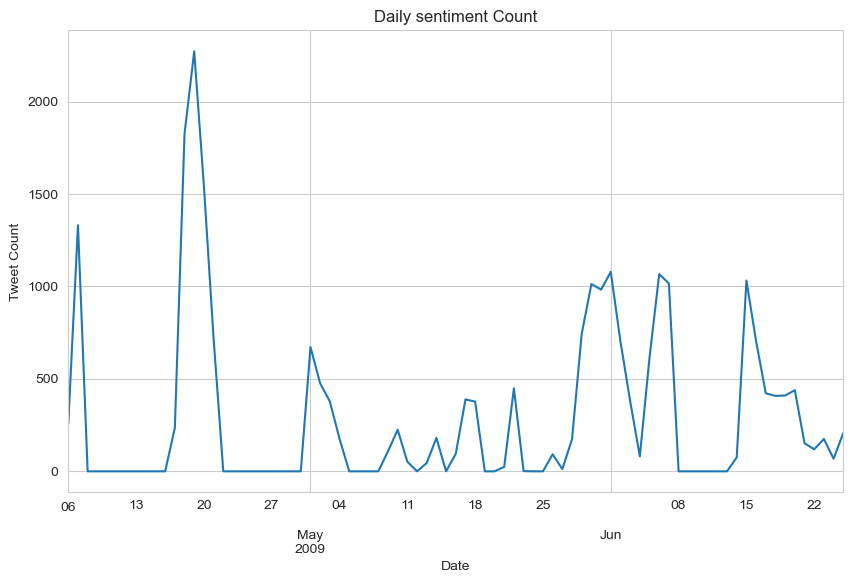

In [51]:
# Plot the time series of daily tweet count
plt.figure(figsize=(10, 6))
daily_tweet_count.plot()
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Daily sentiment Count')
plt.show()

In [52]:
#data = data[['date', 'sentiment']]
data.head()

,Tweet_ID,Twitter_User,tweet_text,tweet_mod,sentiment,sentiment_score,Project_tweets
date,,,,,,,
2009-04-06 22:19:53,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,0.500000,Positive,kenichan dived many times ball managed save 50...
2009-04-06 22:20:03,1467811594,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time no see yes rains a bit ...,0.273333,Positive,loltrish hey long time see yes rains bit bit l...
2009-04-06 22:20:31,1467813579,starkissed,@LettyA ahh ive always wanted to see rent lov...,lettya ahh ive always wanted to see rent love ...,0.500000,Positive,lettya ahh ive always wanted see rent love sou...
2009-04-06 22:20:37,1467813985,quanvu,@alydesigns i was out most of the day so didn'...,alydesigns i was out most of the day so didnt ...,0.350000,Positive,alydesigns day didnt get much done
2009-04-06 22:20:56,1467815199,abel209,ooooh.... LOL that leslie.... and ok I won't ...,ooooh lol that leslie and ok i wont do it agai...,0.225000,Positive,ooooh lol leslie ok wont leslie wont get mad


In [53]:
data = data[['sentiment']]
data.head()

,sentiment
date,
2009-04-06 22:19:53,0.500000
2009-04-06 22:20:03,0.273333
2009-04-06 22:20:31,0.500000
2009-04-06 22:20:37,0.350000
2009-04-06 22:20:56,0.225000


In [58]:
#pip install hvplot

In [54]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='sentiment', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

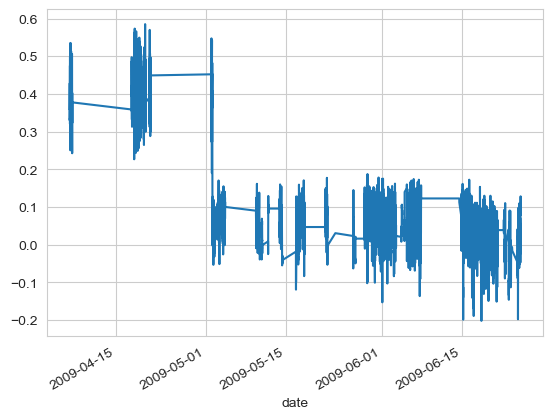

In [55]:
find_outliers(variable='sentiment', window=20, sigma=10)

In [56]:
import panel as pn
#pn.extension()

#pn.interact(find_outliers)

In [57]:
kw = dict(window=(1, 60), variable=sorted(list(data.columns)), sigma=(1, 20))
i = pn.interact(find_outliers, **kw)
i.pprint()

Column
    [0] Column
        [0] Select(name='variable', options=['sentiment'], value='sentiment')
        [1] IntSlider(end=60, name='window', start=1, value=30)
        [2] IntSlider(end=20, name='sigma', start=1, value=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00108')


C:\Users\maria\AppData\Local\Temp\ipykernel_7032\3798767153.py:3: PanelDeprecationWarning: 'Column.pprint' is deprecated and will be removed in version 1.3, use 'print' instead.
  i.pprint()


In [58]:
import param

class Sentiment(param.Parameterized):
    variable  = param.Selector(objects=list(data.columns))
    window    = param.Integer(default=10, bounds=(1, 20))
    sigma     = param.Number(default=10, bounds=(0, 20))

    def view(self):
        return find_outliers(self.variable, self.window, self.sigma)
    
obj = Sentiment()
obj

Sentiment(name='Sentiment00140', sigma=10, variable='sentiment', window=10)

In [59]:
#pn.Row(obj.param, obj.view)

In [60]:
#text = "<br>\n# Room Occupancy\nSelect the variable, and the time window for smoothing"

#p = pn.Row(i[1][0], pn.Column(text, i[0][0], i[0][1]))
#p

In [61]:
import hvplot.pandas

def hvplot(avg, highlight):
    return avg.hvplot(height=200) * highlight.hvplot.scatter(color='orange', padding=0.1)

text2 = "## Sentiment\nSelect the variable and the smoothing values"
hvp   = pn.interact(find_outliers, view_fn=hvplot, **kw)
pn.Column(pn.Row(pn.panel(text2, width=400), hvp[0]), hvp[1]).servable("sentiment")

Column
    [0] Row
        [0] Markdown(str, width=400)
        [1] Column
            [0] Select(name='variable', options=['sentiment'], value='sentiment')
            [1] IntSlider(end=60, name='window', start=1, value=30)
            [2] IntSlider(end=20, name='sigma', start=1, value=10)
    [1] Row(sizing_mode='fixed')
        [0] HoloViews(Overlay, height=200, name='interactive00821', sizing_mode='fixed', width=700)

In [62]:
#indexeddata.index
#data = data.set_index('date')
#data = data.asfreq('MS')
#data = data.sort_index()
#data.head()

In [63]:
#Checking null values
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [64]:
#We still have null values on my dataset
data.isnull().sum()

sentiment    0
dtype: int64

In [65]:
data.index

DatetimeIndex(['2009-04-06 22:19:53', '2009-04-06 22:20:03',
               '2009-04-06 22:20:31', '2009-04-06 22:20:37',
               '2009-04-06 22:20:56', '2009-04-06 22:21:11',
               '2009-04-06 22:21:39', '2009-04-06 22:22:05',
               '2009-04-06 22:22:07', '2009-04-06 22:22:49',
               ...
               '2009-06-25 09:49:24', '2009-06-25 09:53:53',
               '2009-06-25 10:04:00', '2009-06-25 10:04:06',
               '2009-06-25 10:05:56', '2009-06-25 10:08:07',
               '2009-06-25 10:11:34', '2009-06-25 10:13:44',
               '2009-06-25 10:18:09', '2009-06-25 10:19:48'],
              dtype='datetime64[ns]', name='date', length=24000, freq=None)

In [66]:
#Checking for duplicates
duplicate_index = data[data.index.duplicated(keep='first')]
print(duplicate_index)

                     sentiment
date                          
2009-04-06 22:28:45       0.40
2009-04-06 22:33:32       0.25
2009-04-06 23:13:25       0.25
2009-04-06 23:37:44       0.20
2009-04-06 23:43:08       0.20
...                        ...
2009-06-25 07:09:15       0.20
2009-06-25 07:09:15       0.20
2009-06-25 08:10:19       0.20
2009-06-25 08:33:20       0.20
2009-06-25 09:41:19       0.20

[1132 rows x 1 columns]


In [67]:
data = data[~data.index.duplicated(keep='first')]

In [68]:
duplicate_index = data[data.index.duplicated(keep='first')]
print(duplicate_index)

Empty DataFrame
Columns: [sentiment]
Index: []


In [69]:
data.index

DatetimeIndex(['2009-04-06 22:19:53', '2009-04-06 22:20:03',
               '2009-04-06 22:20:31', '2009-04-06 22:20:37',
               '2009-04-06 22:20:56', '2009-04-06 22:21:11',
               '2009-04-06 22:21:39', '2009-04-06 22:22:05',
               '2009-04-06 22:22:07', '2009-04-06 22:22:49',
               ...
               '2009-06-25 09:49:24', '2009-06-25 09:53:53',
               '2009-06-25 10:04:00', '2009-06-25 10:04:06',
               '2009-06-25 10:05:56', '2009-06-25 10:08:07',
               '2009-06-25 10:11:34', '2009-06-25 10:13:44',
               '2009-06-25 10:18:09', '2009-06-25 10:19:48'],
              dtype='datetime64[ns]', name='date', length=22868, freq=None)

In [70]:
data.shape

(22868, 1)

In [97]:
#Visualizing the data
#plt.xlabel('date')
#plt.ylabel('sentiment')
#plt.plot(data)
#It can be seen that data is increasing over time

In [75]:
data = data.asfreq('D')
#data = data.sort_index()
data.index

DatetimeIndex(['2009-05-03 22:19:53', '2009-05-04 22:19:53',
               '2009-05-05 22:19:53', '2009-05-06 22:19:53',
               '2009-05-07 22:19:53', '2009-05-08 22:19:53',
               '2009-05-09 22:19:53', '2009-05-10 22:19:53',
               '2009-05-11 22:19:53', '2009-05-12 22:19:53',
               '2009-05-13 22:19:53', '2009-05-14 22:19:53',
               '2009-05-15 22:19:53', '2009-05-16 22:19:53',
               '2009-05-17 22:19:53', '2009-05-18 22:19:53',
               '2009-05-19 22:19:53', '2009-05-20 22:19:53',
               '2009-05-21 22:19:53', '2009-05-22 22:19:53',
               '2009-05-23 22:19:53', '2009-05-24 22:19:53',
               '2009-05-25 22:19:53', '2009-05-26 22:19:53',
               '2009-05-27 22:19:53', '2009-05-28 22:19:53',
               '2009-05-29 22:19:53', '2009-05-30 22:19:53',
               '2009-05-31 22:19:53'],
              dtype='datetime64[ns]', name='date', freq='D')

In [78]:
#data.head()

In [85]:
#Sorting And Feature Engineering
#sorted_data = data.sort_values(by='date')
#sorted_data=data.copy()
#sorted_data['date'] = pd.to_datetime(data['date']).data.date

#sorted_data['year']         = pd.DatetimeIndex(sorted_data['date']).year
#sorted_data['month']        = pd.DatetimeIndex(sorted_data['date']).month
#sorted_data['day']          = pd.DatetimeIndex(sorted_data['date']).day

In [86]:
#data['date'].duplicated()

In [87]:
#data['date'] = pd.to_datetime(data['date'],infer_datetime_format=True)
#indexeddata = data.set_index(['date'])
#indexeddata.head(5)

In [88]:
#Rename the dependent variable
#indexeddata = data.rename(columns = {'sentiment' : 'y'})
#indexeddata.head(5)

In [89]:
#Visualizing the data
#plt.xlabel('date')
#plt.ylabel('y')
#plt.plot(indexeddata)
#It can be seen that data is increasing over time

In [91]:
#data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d %H:%M:%S') # '%Y-%m-%d %H:%M:%S'
#indexeddata = data.set_index('date')
#indexeddata.head()

In [92]:
#Rename the dependent variable
#indexeddata = data.rename(columns = {'sentiment' : 'y'})
#indexeddata.head(5)

In [93]:
#indexeddata.index
#data = data.set_index('date')
#data = data.asfreq('MS')
#data = data.sort_index()
#data.head()

In [94]:
#data = data.asfreq('D')
#data = data.sort_index()
#data.head()

In [101]:
#Visualizing the data
#plt.xlabel('date')
#plt.ylabel('y')
#plt.plot(indexeddata)
#It can be seen that data is increasing over time

In [102]:
#data = data.asfreq('D')
#data.index